# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

In [1]:
# importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# carregar base num dataframe
previsao_de_renda = pd.read_csv('previsao_de_renda.csv')

In [5]:
previsao_de_renda.head(n = 5)

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [7]:
previsao_de_renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [9]:
# variáveis quantitativas:
    # qtd_filhos - idade - tempo_emprego - qt_pessoas_residencia - renda
previsao_de_renda_quantitativa = previsao_de_renda[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']]
previsao_de_renda_quantitativa_c = previsao_de_renda_quantitativa.copy()

In [11]:
# matriz de correlação
previsao_de_renda_quantitativa.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


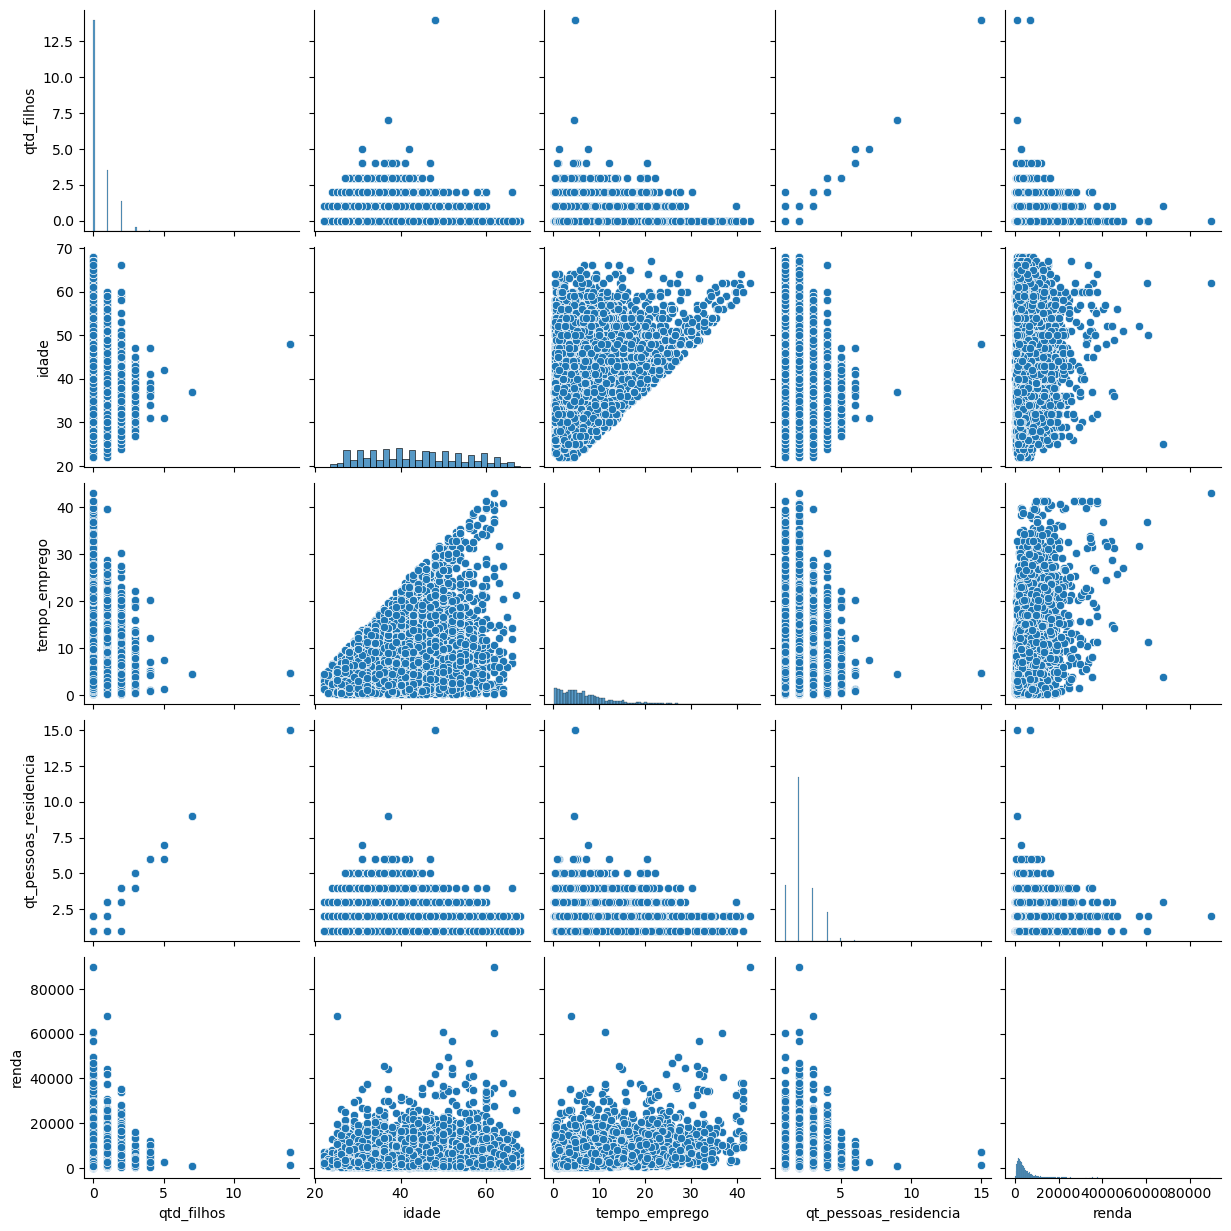

In [13]:
# gráficos de dispersão + histogramas (matriz de dispersão)
sns.pairplot(previsao_de_renda_quantitativa)

#### Através da matriz de correlação, observarmos que apenas uma variável tende a ter um correlação, neste caso positiva, com a variável renda - tempo de emprego. Podemos observar, pelo gráfico de dispersão, que a renda aumenta, de forma tímida, a partir do decimo ano de emprego. Com o passar do tempo, os dados de renda tendem a descolar do intervalo 0 - 40 mil. 

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

In [15]:
# variável 'categoria' para diferenciar valores acima e abaixo de 20 anos
previsao_de_renda_quantitativa_c['categoria'] = ['Acima de 20 anos' if x > 20 else 'Abaixo de 20 anos'
                                                 for x in previsao_de_renda_quantitativa['tempo_emprego']]

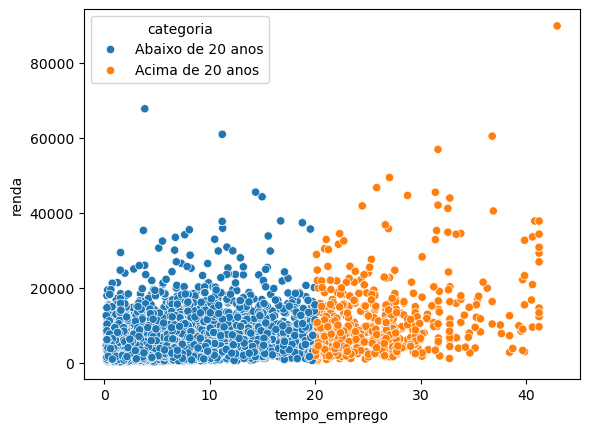

In [17]:
# gráfico de dispersão para as variáveis renda (eixo y) e tempo de emprego (eixo x)
sns.scatterplot(data = previsao_de_renda_quantitativa_c, x = 'tempo_emprego', y = 'renda', hue = 'categoria')
plt.show()

3) Na sua opinião, há outliers na variável renda?

#### Sim, apenas um outiler. No gráfico acima, podemos visualizar um dado no canto superior direito que está descolado da distribuição dos demais dados. O gráfico mostra que este dado possui uma renda acima de 80 mil, sendo que a maior parte dos dados estão concetrados numa faixa abaixo de R$ 50 mil.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [19]:
# cálculo do log2 da variável 'renda'
previsao_de_renda_quantitativa_c['log2_renda'] = np.log2(previsao_de_renda_quantitativa_c['renda'])

In [25]:
previsao_de_renda_quantitativa_c_corr = previsao_de_renda_quantitativa_c.drop(columns = ['categoria'])
previsao_de_renda_quantitativa_c_corr.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log2_renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567,0.023743
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570,0.024712
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235,0.379556
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977,0.036267
renda,0.009567,0.042570,0.394235,0.020977,1.000000,0.835734
log2_renda,0.023743,0.024712,0.379556,0.036267,0.835734,1.000000


<Axes: xlabel='tempo_emprego', ylabel='log2_renda'>

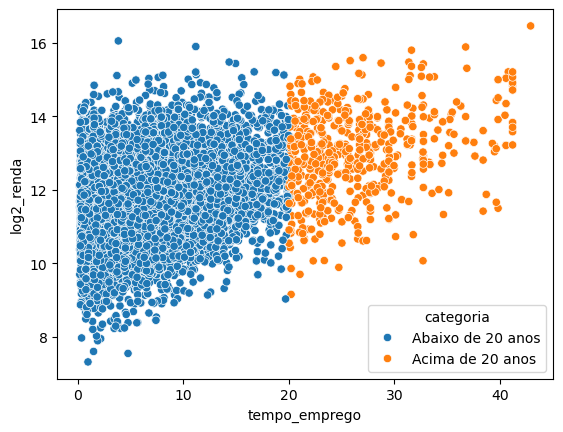

In [23]:
sns.scatterplot(data = previsao_de_renda_quantitativa_c, x = 'tempo_emprego', y = 'log2_renda', hue = 'categoria')

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

#### Com a aplicação do log2 na variável renda, observa-se, na matriz de correlação, um aumento do valor de 0,39 para 0,84. No gráfico acima, percebe-se que não há outliers presentes quando comparado com o gráfico anterior, além dos dados estarem mais próximos dentro dum intervalo no eixo y - 8 à 16.